# Box Time Series Cookbook

This cookbook shows how to make a simple box time series for data for doing simple tests of spectroscopic data.

In [1]:
from tshirt.pipeline import phot_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

## Edit the Extraction Parameters

Here, we start with the default parameters and edit them. Alternatively, you can create a `yaml` file that contains the parameters. There is a database of example parameters here:
https://github.com/eas342/tshirt/tree/master/tshirt/parameters/spec_params

In [2]:
default_phot = phot_pipeline.phot(directParam={})
newParam = default_phot.param

Note: File Search comes up empty


In [3]:
## Tell tshirt where to find the data files
newParam['procFiles'] = '../../../../Documents/hst/corot1/visit01/ibh*.fits'
## Give your source a name
newParam['srcName'] = 'CoRoT-1'
newParam['srcNameShort'] = 'corot1'
## Assign a name for the observing "Night" or name
newParam['nightName'] = 'visit01'
## Identify the box's spatial position. List of [x,y] lists
newParam['refStarPos'] = [[60,73]]
## Define the Geometry and size of the Aperture
newParam['srcGeometry'] = 'Rectangular'
newParam['apHeight'] = 10
newParam['apWidth'] = 30
## Define the background Geometry and size of Aperture
newParam['backWidth'] = 30
newParam['backHeight'] = 10
newParam['bkgGeometry'] = 'Rectangular'
## Choose an offset for the background box
newParam['backOffset'] = [0.,15.] ## here it is offset in X by 0.0 px and Y by 15.0 px

## Choose the FITS extension for the data
newParam['FITSextension'] = 'SCI'

## Set an offset epoch for time series (optional)
newParam['jdRef'] = 2455951

## Set the read noise
newParam['readNoise'] = 20.

In [4]:
phot = phot_pipeline.phot(directParam=newParam)

## Check the aperture
`showStarChoices` shows the source and background apertures we created.
The label "src" is for the first star in the list

/Users/everettschlawin/anaconda/envs/py36/lib/python3.6/site-packages/tshirt/pipeline/phot_pipeline.py:333: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


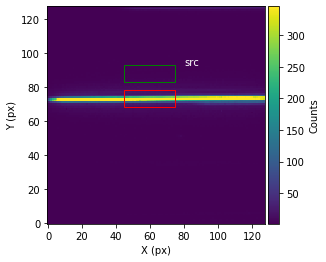

In [5]:
phot.showStarChoices(showAps=True,showPlot=True,apColor='red',backColor='green')

## Do the Extraction on all images
the `useMultiprocessing` keyword uses several simultaneous processors to speed things up

In [6]:
phot.do_phot(useMultiprocessing=True)

On 0 of 98


On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98


In [7]:
from importlib import reload
reload(phot_pipeline)
phot = phot_pipeline.phot(directParam=newParam)

## Retrieve the photometry

In [8]:
t1, t2 = phot.get_tSeries()

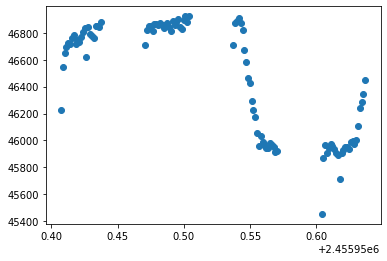

In [9]:
plt.plot(t1['Time (JD)'],t1['Flux 0'],'o')

Here, the transit of CoRoT-1 b is clearly visible in the box photometry